<a href="https://colab.research.google.com/github/ghazaletlbn/my-bachelor-project/blob/main/bachelor_project_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
import scipy.sparse as sp
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.sparse.linalg import eigsh
from scipy.stats import pareto, expon, uniform, weibull_min
import math

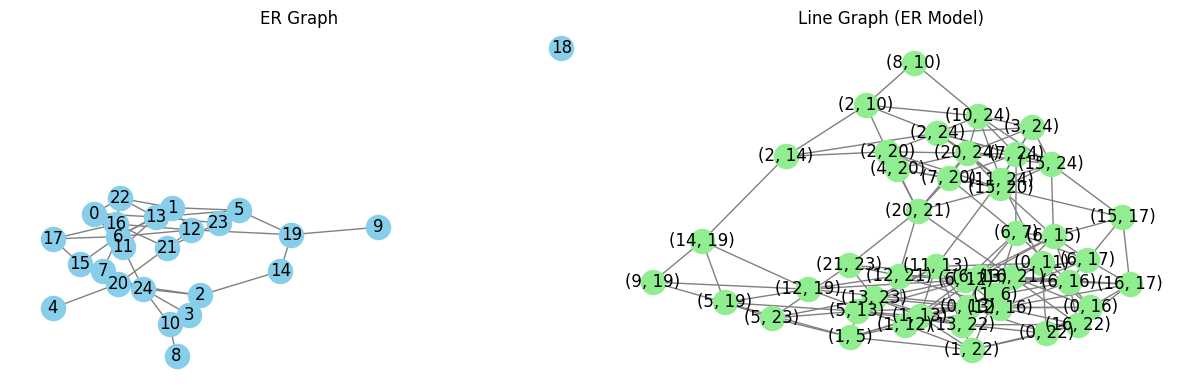

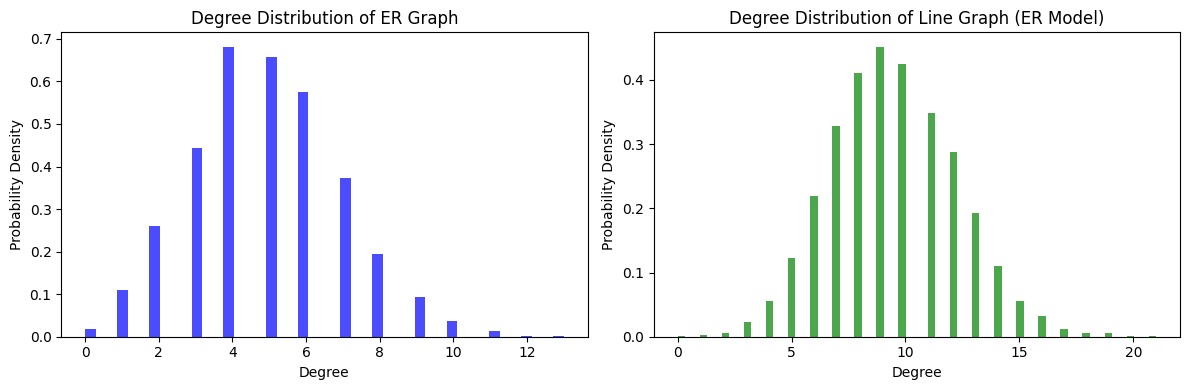

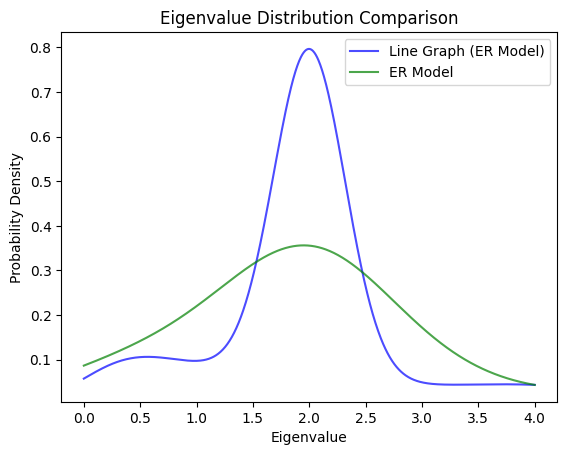

In [ ]:
# Parameters for the ER model
n = 25  # Number of nodes
p = 0.2  # Probability of an edge between two nodes
num_graphs = 100  # Number of ER graphs to generate


# Generate the ER random graph
G_er = nx.erdos_renyi_graph(n, p)

# Generate the line graph
line_graph = nx.line_graph(G_er)

# Plot the ER graph and line graph side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
nx.draw(G_er, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('ER Graph')

plt.subplot(1, 2, 2)
nx.draw(line_graph, with_labels=True, node_color='lightgreen', edge_color='gray')
plt.title('Line Graph (ER Model)')

plt.tight_layout()
plt.show()

n = 25  # Number of nodes

# Generate ER graphs and their line graphs
er_degrees = []
line_degrees = []
line_eigenvalues = []

for _ in range(num_graphs):
    # Generate an ER random graph
    G_er = nx.erdos_renyi_graph(n, p)
    er_degrees.extend(dict(G_er.degree()).values())

    # Generate the line graph
    line_graph = nx.line_graph(G_er)
    line_degrees.extend(dict(line_graph.degree()).values())

    # Calculate eigenvalues of the line graph
    eigenvalues = np.abs(np.linalg.eigvals(nx.adjacency_matrix(line_graph).toarray()))
    line_eigenvalues.extend(eigenvalues)

# Plot the degree distribution of ER graph and line graph
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(er_degrees, bins='auto', density=True, alpha=0.7, color='blue')
plt.title('Degree Distribution of ER Graph')
plt.xlabel('Degree')
plt.ylabel('Probability Density')

plt.subplot(1, 2, 2)
plt.hist(line_degrees, bins='auto', density=True, alpha=0.7, color='green')
plt.title('Degree Distribution of Line Graph (ER Model)')
plt.xlabel('Degree')
plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()


# Generate ER model's line graph for comparison
G_er = nx.erdos_renyi_graph(n, p)
line_graph_er = nx.line_graph(G_er)
er_eigenvalues = np.abs(np.linalg.eigvals(nx.adjacency_matrix(line_graph_er).toarray()))


kde_line = gaussian_kde(line_eigenvalues)
kde_er = gaussian_kde(er_eigenvalues)

# Plot the eigenvalue distribution using KDE plot
x = np.linspace(0, np.max(4), 1000)
y_line = kde_line(x)
y_er = kde_er(x)

plt.plot(x, y_line, color='blue', alpha=0.7, label='Line Graph (ER Model)')
plt.plot(x, y_er, color='green', alpha=0.7, label='ER Model')
plt.title('Eigenvalue Distribution Comparison')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

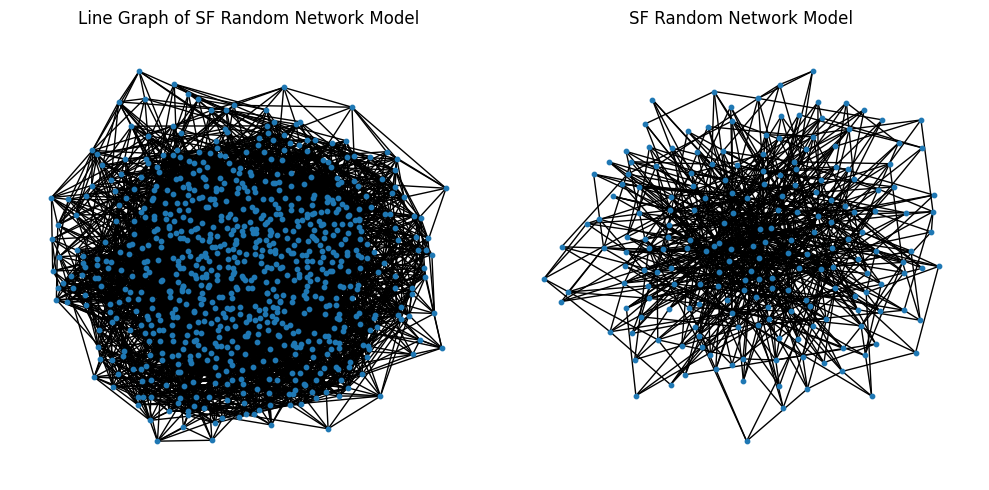

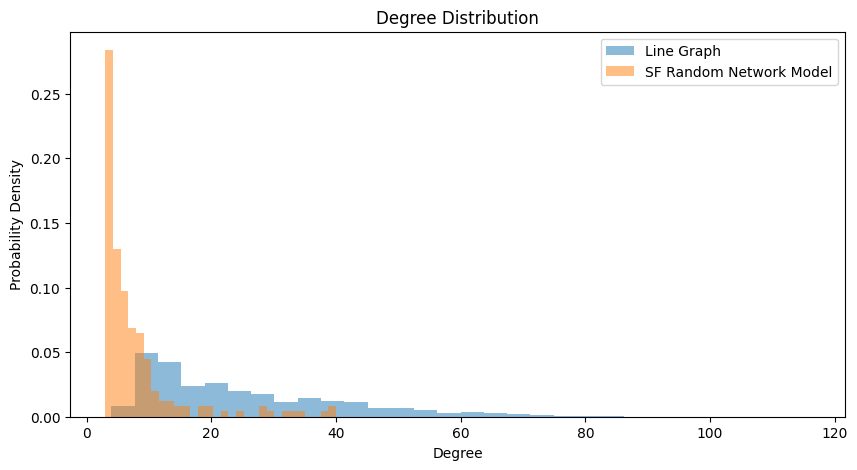

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:905: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6793: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


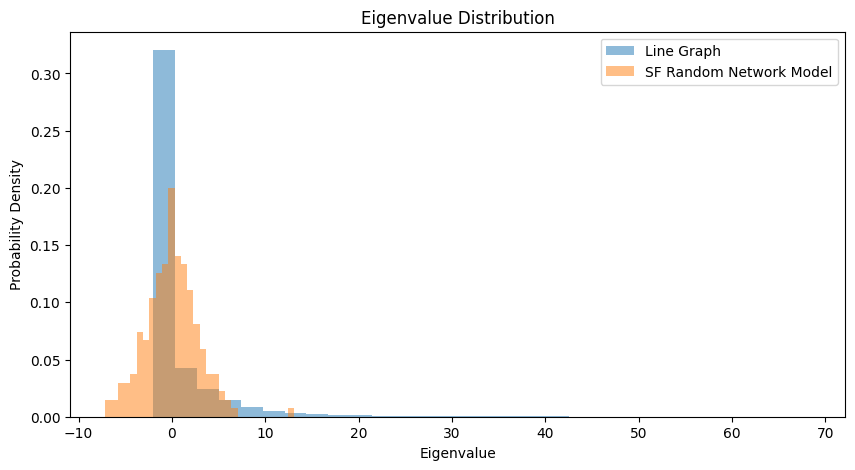

In [ ]:


# Parameters
n = 200  # Number of nodes
m = 4  # Number of edges to attach from a new node to existing nodes

# Generate SF Random Network Model (Barabasi-Albert model)
sf_model = nx.barabasi_albert_graph(n, m)

# Generate line graph of the SF Random Network Model
line_graph = nx.line_graph(sf_model)

# Plot and compare line graph of SF Random Network Model with its model
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
nx.draw(line_graph, node_size=10)
plt.title("Line Graph of SF Random Network Model")

plt.subplot(1, 2, 2)
nx.draw(sf_model, node_size=10)
plt.title("SF Random Network Model")
plt.tight_layout()
plt.show()


# Parameters
n = 200  # Number of nodes
m = 4  # Number of edges to attach from a new node to existing nodes
num_graphs = 100  # Number of graphs to generate

# Lists to store degree and eigenvalue distributions
line_graph_degrees = []
line_graph_eigenvalues = []

for _ in range(num_graphs):
    # Generate SF Random Network Model (Barabasi-Albert model)
    sf_model = nx.barabasi_albert_graph(n, m)

    # Generate line graph of the SF Random Network Model
    line_graph = nx.line_graph(sf_model)

    # Get degrees and eigenvalues of the line graph
    line_graph_degrees.extend([d for _, d in line_graph.degree()])
    line_graph_eigenvalues.extend(np.linalg.eigvals(nx.to_numpy_array(line_graph)))

# Plot and compare Probability density function of Degree Distribution of line graph with its model
sf_model_degrees = [d for _, d in nx.degree(sf_model)]

plt.figure(figsize=(10, 5))
plt.hist(line_graph_degrees, bins=30, density=True, alpha=0.5, label='Line Graph')
plt.hist(sf_model_degrees, bins=30, density=True, alpha=0.5, label='SF Random Network Model')
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.title('Degree Distribution')
plt.legend()
plt.show()

# Plot and compare Probability density function of eigenvalue Distribution of line graph with its model
sf_model_eigenvalues = np.linalg.eigvals(nx.to_numpy_array(sf_model))

plt.figure(figsize=(10, 5))
plt.hist(line_graph_eigenvalues, bins=30, density=True, alpha=0.5, label='Line Graph')
plt.hist(sf_model_eigenvalues, bins=30, density=True, alpha=0.5, label='SF Random Network Model')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Eigenvalue Distribution')
plt.legend()
plt.show()

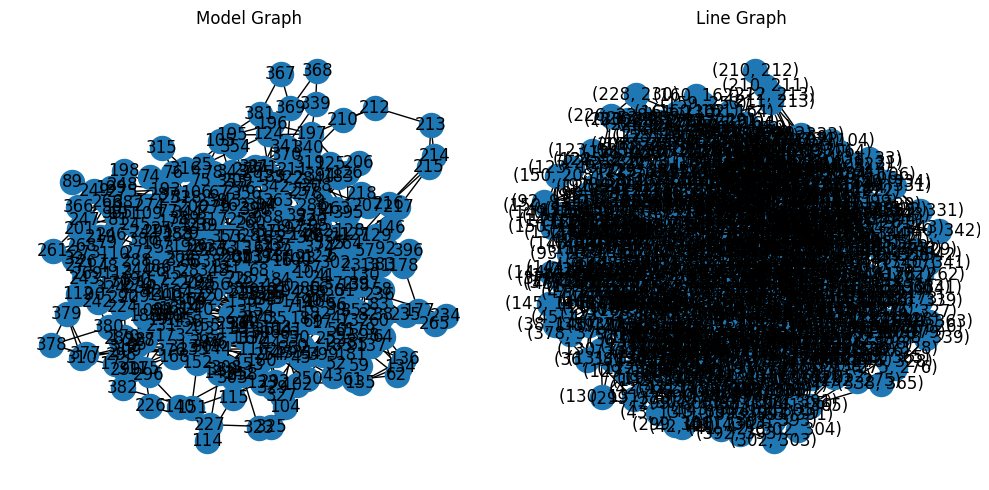

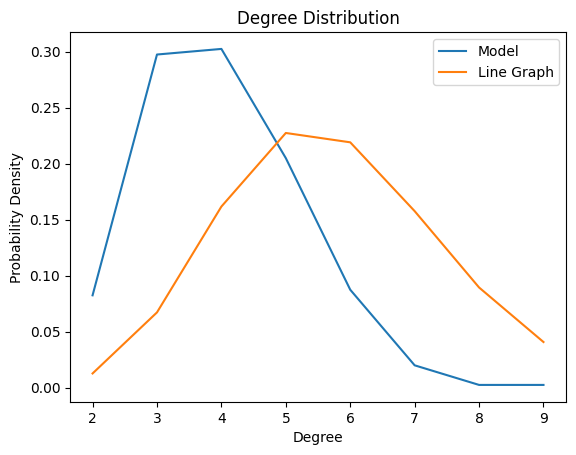

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


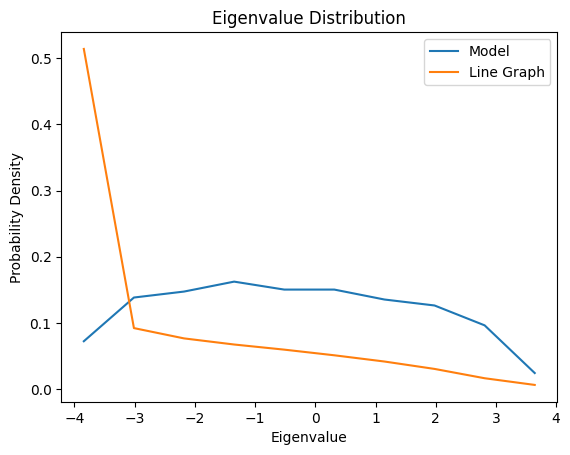

In [ ]:
def generate_ws_graph(n, k, p):
    return nx.watts_strogatz_graph(n, k, p)

def calculate_degree_distribution(graph):
    degrees = [graph.degree(node) for node in graph.nodes()]
    unique_degrees, degree_counts = np.unique(degrees, return_counts=True)
    degree_distribution = degree_counts / float(sum(degree_counts))
    return unique_degrees, degree_distribution

def calculate_eigenvalue_distribution(graph):
    eigenvalues = nx.adjacency_spectrum(graph)
    eigenvalue_distribution, bins = np.histogram(eigenvalues, density=True)
    return bins[:-1], eigenvalue_distribution

def simulate_line_graph_properties(n, k, p, num_graphs):
    degree_dist_line_graphs = []
    eigen_dist_line_graphs = []
    line_graphs = []

    for _ in range(num_graphs):
        # Generate the WS random graph
        ws_graph = generate_ws_graph(n, k, p)

        # Generate the line graph
        line_graph = nx.line_graph(ws_graph)
        line_graphs.append(line_graph)

        # Calculate degree distribution of line graph
        degree_dist_line_graph = calculate_degree_distribution(line_graph)
        degree_dist_line_graphs.append(degree_dist_line_graph)

        # Calculate eigenvalue distribution of line graph
        eigen_dist_line_graph = calculate_eigenvalue_distribution(line_graph)
        eigen_dist_line_graphs.append(eigen_dist_line_graph)

    # Determine the maximum length of degree distributions
    max_degree_length = max(len(dist[0]) for dist in degree_dist_line_graphs)

    # Pad degree distributions with zeros to ensure equal length
    for i in range(len(degree_dist_line_graphs)):
        degree_dist_line_graphs[i] = (
            np.pad(degree_dist_line_graphs[i][0], (0, max_degree_length - len(degree_dist_line_graphs[i][0]))),
            np.pad(degree_dist_line_graphs[i][1], (0, max_degree_length - len(degree_dist_line_graphs[i][1])))
        )

    # Average degree distribution across multiple graphs
    avg_degree_dist_line_graph = np.mean([dist[1] for dist in degree_dist_line_graphs], axis=0)

    # Average eigenvalue distribution across multiple graphs
    avg_eigen_dist_line_graph = np.mean([dist[1] for dist in eigen_dist_line_graphs], axis=0)

    return avg_degree_dist_line_graph, avg_eigen_dist_line_graph, line_graphs

def plot_degree_distribution(degree_dist_model, degree_dist_line_graph):
    plt.plot(degree_dist_model[0], degree_dist_model[1][:len(degree_dist_model[0])], label='Model')
    plt.plot(degree_dist_line_graph[0], degree_dist_line_graph[1][:len(degree_dist_line_graph[0])], label='Line Graph')
    plt.xlabel('Degree')
    plt.ylabel('Probability Density')
    plt.title('Degree Distribution')
    plt.legend()
    plt.show()

def plot_eigenvalue_distribution(eigen_dist_model, eigen_dist_line_graph):
    plt.plot(eigen_dist_model[0], eigen_dist_model[1], label='Model')
    plt.plot(eigen_dist_line_graph[0], eigen_dist_line_graph[1], label='Line Graph')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Probability Density')
    plt.title('Eigenvalue Distribution')
    plt.legend()
    plt.show()

def plot_graph_comparison(model_graph, line_graph):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    nx.draw(model_graph, with_labels=True)
    plt.title('Model Graph')
    plt.subplot(1, 2, 2)
    nx.draw(line_graph, with_labels=True)
    plt.title('Line Graph')
    plt.tight_layout()
    plt.show()

# Parameters for the Watts-Strogatz model
n = 400  # Number of nodes
k = 4    # Number of nearest neighbors
p = 0.5  # Rewiring probability

# Number of graphs to simulate
num_graphs = 100

# Simulate line graph properties
avg_degree_dist_line_graph, avg_eigen_dist_line_graph, line_graphs = simulate_line_graph_properties(n, k, p, num_graphs)

# Generate the WS random graph
ws_graph = generate_ws_graph(n, k, p)


# Randomly select two graphs for comparison
graph_idx1 = np.random.randint(num_graphs)

# Plot and compare graph structure
plot_graph_comparison(ws_graph, line_graphs[graph_idx1])

# Calculate degree distribution of WS random graph
degree_dist_model = calculate_degree_distribution(ws_graph)

# Calculate eigenvalue distribution of WS random graph
eigen_dist_model = calculate_eigenvalue_distribution(ws_graph)

# Plot and compare degree distribution
plot_degree_distribution(degree_dist_model, (degree_dist_model[0], avg_degree_dist_line_graph))

# Plot and compare eigenvalue distribution
plot_eigenvalue_distribution(eigen_dist_model, (eigen_dist_model[0], avg_eigen_dist_line_graph))


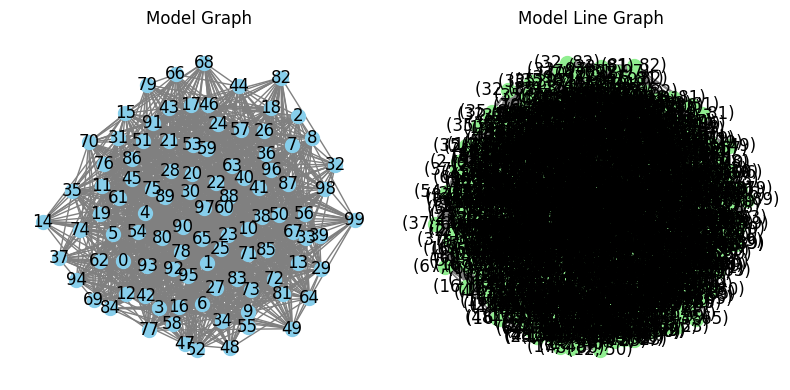

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:905: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)


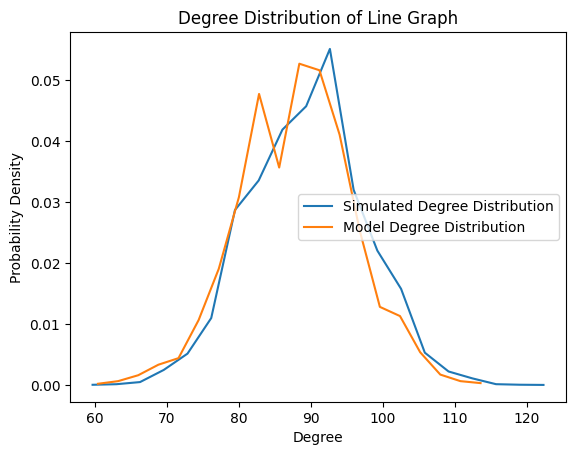

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


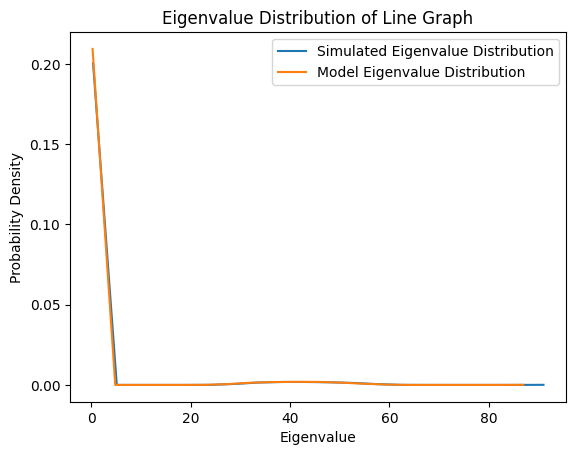

In [ ]:
# Function to generate RSRBG Random Network Model
def rsrbg_random_network(n, p, q):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            r = np.random.uniform()
            if r < p:
                G.add_edge(i, j)
            elif r < p + q:
                G.add_edge(i, j, weight=np.random.uniform())
    return G

# Function to calculate probability density function (PDF)
def calculate_pdf(data, bins):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist

# Parameters for RSRBG Random Network Model
n = 100  # Number of nodes
p = 0.2  # Probability of adding an edge between two nodes
q = 0.1  # Probability of adding an edge with weight between two nodes

model_G = rsrbg_random_network(n, p, q)
model_line_graph = nx.line_graph(model_G)

# Plot the model graph
plt.figure(figsize=(8, 4))
plt.subplot(121)
nx.draw(model_G, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray')
plt.title('Model Graph')

# Plot the model line graph
plt.subplot(122)
nx.draw(model_line_graph, with_labels=True, node_color='lightgreen', node_size=100, edge_color='gray')
plt.title('Model Line Graph')

plt.tight_layout()
plt.show()

# Simulating graphs and calculating degree and eigenvalue distributions
n = 150  # Number of nodes
num_graphs = 20
degree_data = []
eigenvalue_data = []
for _ in range(num_graphs):
    G = rsrbg_random_network(n, p, q)
    line_graph = nx.line_graph(G)

    degrees = list(dict(line_graph.degree()).values())
    degree_data.extend(degrees)

    eigenvalues = nx.adjacency_spectrum(line_graph)
    eigenvalue_data.extend(eigenvalues)

# Calculate PDFs of degree distribution and eigenvalue distribution
degree_bin_centers, degree_pdf = calculate_pdf(degree_data, bins=20)
eigenvalue_bin_centers, eigenvalue_pdf = calculate_pdf(eigenvalue_data, bins=20)

# Generate the model line graph
model_G = rsrbg_random_network(n, p, q)
model_line_graph = nx.line_graph(model_G)

# Calculate the degree distribution of the model line graph
model_degrees = list(dict(model_line_graph.degree()).values())
model_degree_bin_centers, model_degree_pdf = calculate_pdf(model_degrees, bins=20)

# Calculate the eigenvalue distribution of the model line graph
model_eigenvalues = nx.adjacency_spectrum(model_line_graph)
model_eigenvalue_bin_centers, model_eigenvalue_pdf = calculate_pdf(model_eigenvalues, bins=20)

# Plotting and comparing degree distribution
plt.plot(degree_bin_centers, degree_pdf, label='Simulated Degree Distribution')
plt.plot(model_degree_bin_centers, model_degree_pdf, label='Model Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.title('Degree Distribution of Line Graph')
plt.legend()
plt.show()

# Plotting and comparing eigenvalue distribution
plt.plot(eigenvalue_bin_centers, eigenvalue_pdf, label='Simulated Eigenvalue Distribution')
plt.plot(model_eigenvalue_bin_centers, model_eigenvalue_pdf, label='Model Eigenvalue Distribution')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Eigenvalue Distribution of Line Graph')
plt.legend()
plt.show()

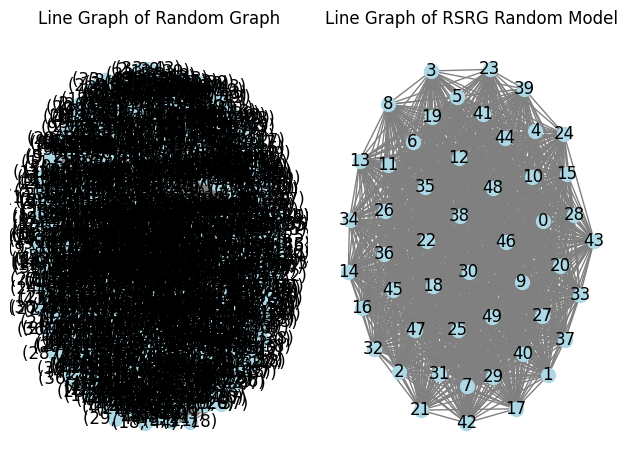

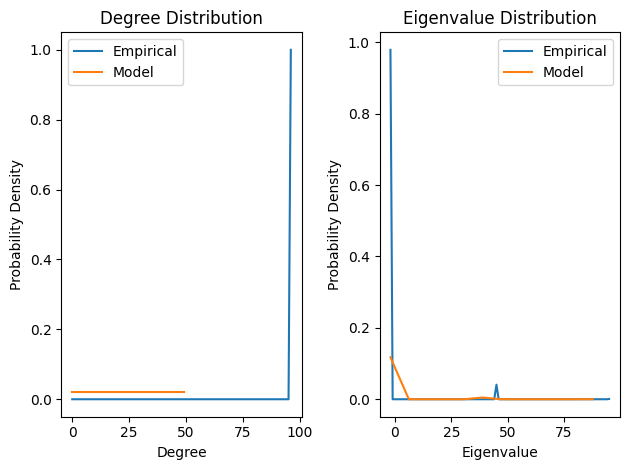

In [ ]:
def generate_rsrg_graph(n, p):
   # Create an initial complete graph with n nodes
    graph = [[1] * n for _ in range(n)]

    # Add new nodes iteratively
    for i in range(2, n + 1):
        new_node = [0] * i

        # Determine the number of connections for the new node
        num_connections = int(p * i)

        # Randomly select existing nodes to connect
        connected_nodes = random.sample(range(i - 1), num_connections)

        # Connect the new node to the selected existing nodes
        for node in connected_nodes:
            new_node[node] = 1
            graph[i-1][node] = 1

        # Append the new node to the graph
        graph.append(new_node)

    return graph


def plot_line_graph_comparison(n, p):
    # Generate an RSRG random graph
    rsrg_graph = generate_rsrg_graph(n, p)

    # Convert the adjacency matrix to an edge list
    edges = []
    for i in range(len(rsrg_graph)):
        for j in range(i + 1, len(rsrg_graph[i])):
            if rsrg_graph[i][j] == 1:
                edges.append((i, j))

    # Create a networkx graph from the edge list
    G = nx.Graph()
    G.add_edges_from(edges)


    # Create the line graph of the random graph
    line_graph = nx.line_graph(G)

    # Plot the line graph of the random graph
    plt.subplot(121)
    pos = nx.spring_layout(line_graph)
    nx.draw(line_graph, pos, with_labels=True, node_size=100, node_color='lightblue', edge_color='gray')
    plt.title('Line Graph of Random Graph')

    # Plot the model of the line graph
    plt.subplot(122)
    rsrg_graph1 = generate_rsrg_graph(n, p)

    # Convert the adjacency matrix to an edge list
    edges = []
    for i in range(len(rsrg_graph1)):
        for j in range(i + 1, len(rsrg_graph[i])):
            if rsrg_graph[i][j] == 1:
                edges.append((i, j))

    # Create a networkx graph from the edge list
    G1 = nx.Graph()
    G1.add_edges_from(edges)
    model_line_graph = G1
    pos = nx.spring_layout(model_line_graph)
    nx.draw(model_line_graph, pos, with_labels=True, node_size=100, node_color='lightblue', edge_color='gray')
    plt.title('Line Graph of RSRG Random Model')

    # Adjust subplot spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

# Define the parameters for the RSRG random graph
n = 50  # Number of initial nodes
p = 0.3  # Probability of adding a new node

# Generate and plot the line graph comparison
plot_line_graph_comparison(n, p)



def simulate_line_graph(n, p, num_graphs):
    degree_distributions = []
    eigenvalue_distributions = []

    for _ in range(num_graphs):
        # Generate an RSRG random graph
        rsrg_graph = generate_rsrg_graph(n, p)

        # Convert the adjacency matrix to an edge list
        edges = []
        for i in range(len(rsrg_graph)):
            for j in range(i + 1, len(rsrg_graph[i])):
                if rsrg_graph[i][j] == 1:
                    edges.append((i, j))

        # Create a networkx graph from the edge list
        G = nx.Graph()
        G.add_edges_from(edges)

        # Calculate the degree distribution of the line graph
        line_graph = nx.line_graph(G)
        degree_sequence = [degree for _, degree in line_graph.degree()]
        degree_distributions.append(degree_sequence)

        # Calculate the eigenvalue distribution of the line graph
        eigenvalues = nx.adjacency_spectrum(line_graph).real
        eigenvalue_distributions.append(eigenvalues)

    return degree_distributions, eigenvalue_distributions


# Define the parameters for the RSRG graph and simulation
n = 50  # Number of nodes
p = 0.3  # Probability of connection
num_graphs = 100  # Number of graphs to simulate

# Simulate generating the graphs and obtain degree and eigenvalue distributions
degree_distributions, eigenvalue_distributions = simulate_line_graph(n, p, num_graphs)

# Calculate the empirical degree distribution
degree_sequence = [degree for distribution in degree_distributions for degree in distribution]
empirical_degree_hist, empirical_degree_bins = np.histogram(degree_sequence, bins=range(max(degree_sequence) + 2), density=True)

# Calculate the empirical eigenvalue distribution
eigenvalues = [eigenvalue for distribution in eigenvalue_distributions for eigenvalue in distribution]
num_bins = min(len(eigenvalues) // 1000, 100)  # Adjust the number of bins based on the number of eigenvalues
empirical_eigenvalue_hist, empirical_eigenvalue_bins = np.histogram(eigenvalues, bins=num_bins, density=True)

# Generate the model degree distribution
rsrg_graph = generate_rsrg_graph(n, p)
# Convert the adjacency matrix to an edge list
edges = []
for i in range(len(rsrg_graph)):
  for j in range(i + 1, len(rsrg_graph[i])):
      if rsrg_graph[i][j] == 1:
          edges.append((i, j))

# Create a networkx graph from the edge list
G = nx.Graph()
G.add_edges_from(edges)
model_degree_sequence = G
model_degree_hist, model_degree_bins = np.histogram(model_degree_sequence, bins=range(max(model_degree_sequence)+2), density=True)

# Generate the model eigenvalue distribution
model_line_graph = nx.line_graph(nx.Graph(model_degree_sequence))
model_eigenvalues = nx.adjacency_spectrum(model_line_graph).real
num_model_bins = min(len(model_eigenvalues) // 100, 100)  # Adjust the number of bins based on the number of eigenvalues
model_eigenvalue_hist, model_eigenvalue_bins = np.histogram(model_eigenvalues, bins=num_model_bins, density=True)

# Plot the Degree Distribution
plt.subplot(121)
plt.plot(empirical_degree_bins[:-1], empirical_degree_hist, label='Empirical')
plt.plot(model_degree_bins[:-1], model_degree_hist, label='Model')
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.title('Degree Distribution')
plt.legend()

# Plot the Eigenvalue Distribution
plt.subplot(122)
plt.plot(empirical_eigenvalue_bins[:-1], empirical_eigenvalue_hist, label='Empirical')
plt.plot(model_eigenvalue_bins[:-1], model_eigenvalue_hist, label='Model')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Eigenvalue Distribution')
plt.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()